### Import The Relevant Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [4]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 10000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [6]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

In [7]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 2
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
313/313 - 1s - 3ms/step - loss: 2.6920
Epoch 2/100
313/313 - 0s - 1ms/step - loss: 0.3818
Epoch 3/100
313/313 - 0s - 1ms/step - loss: 0.3805
Epoch 4/100
313/313 - 0s - 1ms/step - loss: 0.3755
Epoch 5/100
313/313 - 0s - 1ms/step - loss: 0.3917
Epoch 6/100
313/313 - 0s - 1ms/step - loss: 0.3904
Epoch 7/100
313/313 - 0s - 1ms/step - loss: 0.3816
Epoch 8/100
313/313 - 0s - 1ms/step - loss: 0.3770
Epoch 9/100
313/313 - 0s - 1ms/step - loss: 0.3851
Epoch 10/100
313/313 - 0s - 1ms/step - loss: 0.3914
Epoch 11/100
313/313 - 0s - 1ms/step - loss: 0.3829
Epoch 12/100
313/313 - 0s - 1ms/step - loss: 0.3798
Epoch 13/100
313/313 - 0s - 1ms/step - loss: 0.3842
Epoch 14/100
313/313 - 0s - 1ms/step - loss: 0.3891
Epoch 15/100
313/313 - 0s - 1ms/step - loss: 0.3802
Epoch 16/100
313/313 - 0s - 1ms/step - loss: 0.3855
Epoch 17/100
313/313 - 0s - 1ms/step - loss: 0.3891
Epoch 18/100
313/313 - 0s - 1ms/step - loss: 0.3875
Epoch 19/100
313/313 - 0s - 1ms/step - loss: 0.3828
Epoch 20/100
313/313 

### Extract the Weights and bias

In [9]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

[array([[ 1.995276 ],
        [-2.9947684]], dtype=float32),
 array([4.9987593], dtype=float32)]

In [10]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.995276 ],
       [-2.9947684]], dtype=float32)

In [11]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([4.9987593], dtype=float32)

### Extract the Outputs (make predictions)

In [13]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
model.predict_on_batch(training_data['inputs']).round(1)

array([[  9.3],
       [ 22.9],
       [ 16. ],
       ...,
       [ 32.9],
       [-10.7],
       [ 13.9]], dtype=float32)

In [14]:
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
training_data['targets'].round(1)

array([[  8.5],
       [ 22.8],
       [ 16.6],
       ...,
       [ 32.7],
       [-11.3],
       [ 13.2]])

### Plotting the Data

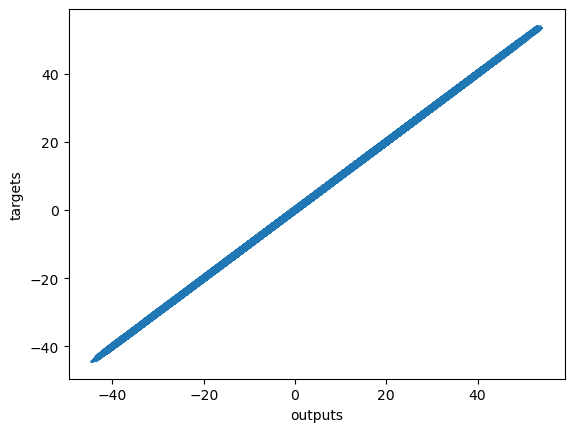

In [16]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper in the next chapter,
# TensorFlow will save us hundreds of lines of code.